In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1 / 255.0)
inputshape = (128, 128)
directoryPath = 'cell_images'
AllImg = train_datagen.flow_from_directory(
    directoryPath,  # This is the source directory for training images
    target_size=inputshape,
    classes=['Parasitized', 'Uninfected'],
    shuffle='FALSE',
    class_mode='binary')


Found 27558 images belonging to 2 classes.


In [2]:
## Defining a function to plot 10 sample image batches
import matplotlib.pyplot as plt


def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(25, 25))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

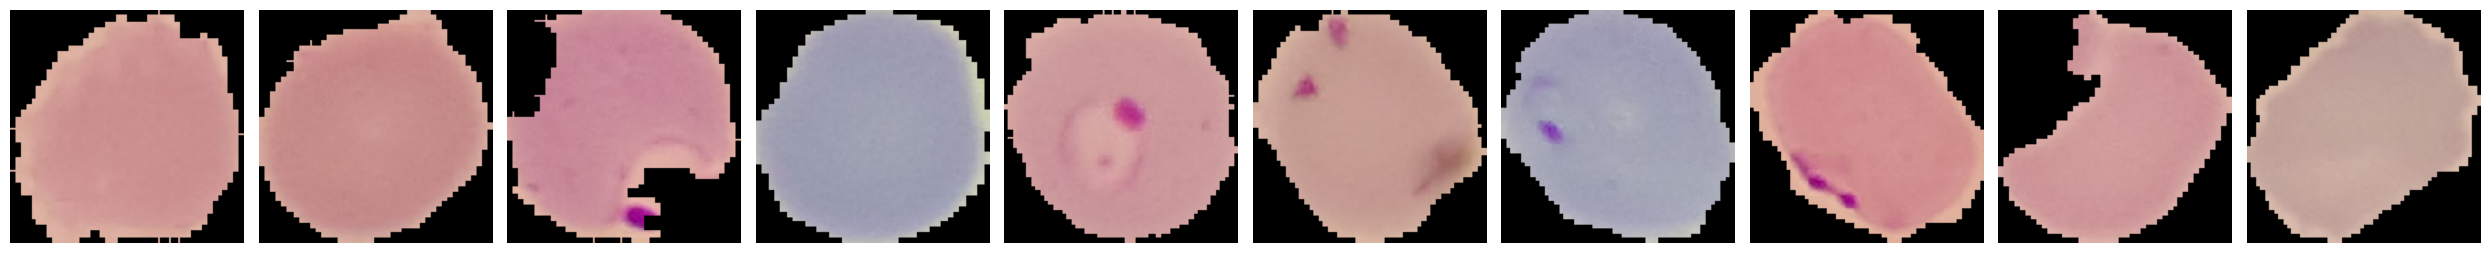

[1. 1. 0. 1. 0. 0. 0. 0. 1. 1.]
{'Parasitized': 0, 'Uninfected': 1}


In [3]:
## Plotting sample images and its corresponding labels from the dataset

allImgs, allLabels = next(AllImg)

allClass = AllImg.class_indices
plotImages(allImgs)
print(allLabels[0:10])
print(allClass)

In [4]:
preprocessingCNN1 = ImageDataGenerator(rescale=1 / 255.0, validation_split=0.2)


In [5]:
## train batch for CNN1
train_batchCNN1 = preprocessingCNN1.flow_from_directory(directory=directoryPath,
                                                        target_size=inputshape,
                                                        classes=['Parasitized', 'Uninfected'],
                                                        class_mode='binary',
                                                        batch_size=40,
                                                        subset='training'
                                                        )

Found 22048 images belonging to 2 classes.


In [6]:
## validation batch for CNN1
valid_batchCNN1 = preprocessingCNN1.flow_from_directory(directoryPath,
                                                        target_size=inputshape,
                                                        classes=['Parasitized', 'Uninfected'],
                                                        class_mode='binary',
                                                        batch_size=40,
                                                        subset='validation'
                                                        )

Found 5510 images belonging to 2 classes.


In [7]:
## test batch for CNN1
test_batchCNN1 = preprocessingCNN1.flow_from_directory(directoryPath,
                                                       target_size=inputshape,
                                                       classes=['Parasitized', 'Uninfected'],
                                                       class_mode='binary',
                                                       batch_size=32,
                                                       shuffle=False
                                                       )

Found 27558 images belonging to 2 classes.


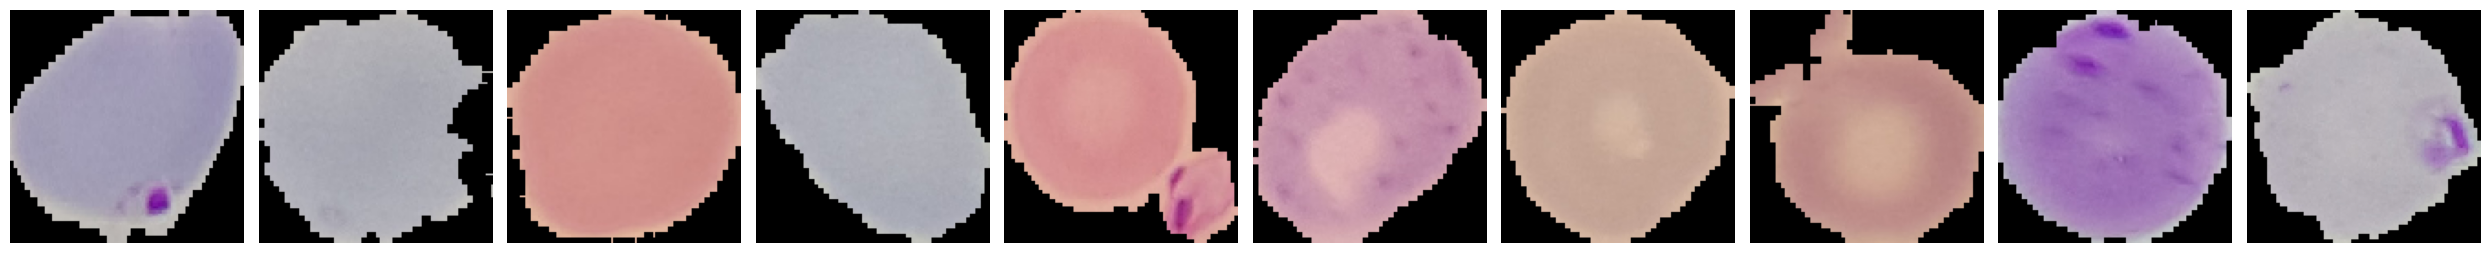

[0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
{'Parasitized': 0, 'Uninfected': 1}


In [8]:
## plotting sample train images

imgs, labels = next(train_batchCNN1)

plotImages(imgs)
print(labels[0:10])
print(allClass)

In [9]:
import tensorflow as tf
import numpy as np

In [10]:
tf.config.run_functions_eagerly(True)


In [11]:
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import keras

In [12]:
##Adding layers for CNN1

CNN1 = Sequential()

CNN1.add(Conv2D(64, (3, 3), input_shape=inputshape + (3,), activation='relu'))
CNN1.add(MaxPool2D(2, 2))
CNN1.add(Dropout(0.2))

CNN1.add(Conv2D(32, (3, 3), activation='relu'))
CNN1.add(MaxPool2D(2, 2))
CNN1.add(Dropout(0.3))

CNN1.add(Flatten())
CNN1.add(Dense(128, activation='relu'))
CNN1.add(Dropout(0.5))

CNN1.add(Dense(1, activation='sigmoid'))


In [13]:
CNN1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 32)        0

In [14]:
CNN1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
## fitting the CNN1 model
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience=4)

history = CNN1.fit_generator(generator=train_batchCNN1,
                             steps_per_epoch=len(train_batchCNN1),
                             epochs=25,
                             validation_data=valid_batchCNN1,
                             validation_steps=len(valid_batchCNN1),
                             callbacks=[callback])

C:\Users\Deepu Singla\AppData\Local\Temp\ipykernel_6760\2146194581.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = CNN1.fit_generator(generator=train_batchCNN1,
G:\PycharmProjects\ML_TRAIL\venv\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/25
340/552 [=================>............] - ETA: 4:28 - loss: 0.6742 - accuracy: 0.5881

In [ ]:
## Plotting model accuracy and loss

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
## prediction using CNN1 model

from sklearn.metrics import classification_report, confusion_matrix

test_batchCNN1.reset()

true = test_batchCNN1.classes
pred = CNN1.predict(x=test_batchCNN1, steps=len(test_batchCNN1), verbose=0)
pred = np.round(pred)

In [ ]:
## classification_report

print('Confusion Matrix')
print(confusion_matrix(true, pred))
print('Classification Report')
target_names = ['Parasitized', 'Un-Infected']
print(classification_report(true, pred, target_names=target_names))

In [ ]:
## Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true, pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='icefire')

ax.set_title('Confusion Matrix for CNN1 Model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Parasitized', 'Un-Infected'])
ax.yaxis.set_ticklabels(['Parasitized', 'Un-Infected'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
CNN1.save("CellModel")